# Jacobsville pmag tilt correction orientation compilation

In [6]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import mplstereonet  # in PATH?
from pyproj import Proj
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [7]:
def calc_bedding_stats(dataframe):
    dataframe['pole_trend'] = dataframe['dipAzimuth'] - 180
    dataframe['pole_plunge'] = 90 - dataframe['dip']
    mean_pole = ipmag.fisher_mean(dataframe['pole_trend'].tolist(),dataframe['pole_plunge'].tolist())
    mean_strike = mean_pole['dec'] + 90
    if mean_strike > 360:
        mean_strike = mean_strike - 360
    mean_dip = 90 - mean_pole['inc']
    print('dip_dir; strike; dip; n: ',np.round([mean_strike+90, mean_strike, mean_dip,mean_pole['n']], 0))
    return dataframe

def plot_bedding_stats(dataframe):
    mean_pole = ipmag.fisher_mean(dataframe['pole_trend'].tolist(),dataframe['pole_plunge'].tolist())
    mean_strike = mean_pole['dec'] + 90
    if mean_strike > 360:
        mean_strike = mean_strike - 360
    mean_dip = 90 - mean_pole['inc']
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='stereonet')
    ax.plane(dataframe['strike'], dataframe['dip'],color='grey')
    ax.plane(mean_strike, mean_dip,color='red',linewidth=5)
    ax.pole(dataframe['strike'], dataframe['dip'],color='grey')
    ax.pole(mean_strike, mean_dip,color='red')

    return ax
    

## Natural Wall section 1 specimen 1 to 9


In [5]:
NW1_1_9_data = pd.read_csv('../Data/Bedding_orientations/NW1_1_9_bedding.csv')


dip_dir; strike; dip; n:  [277. 187.  61.  23.]


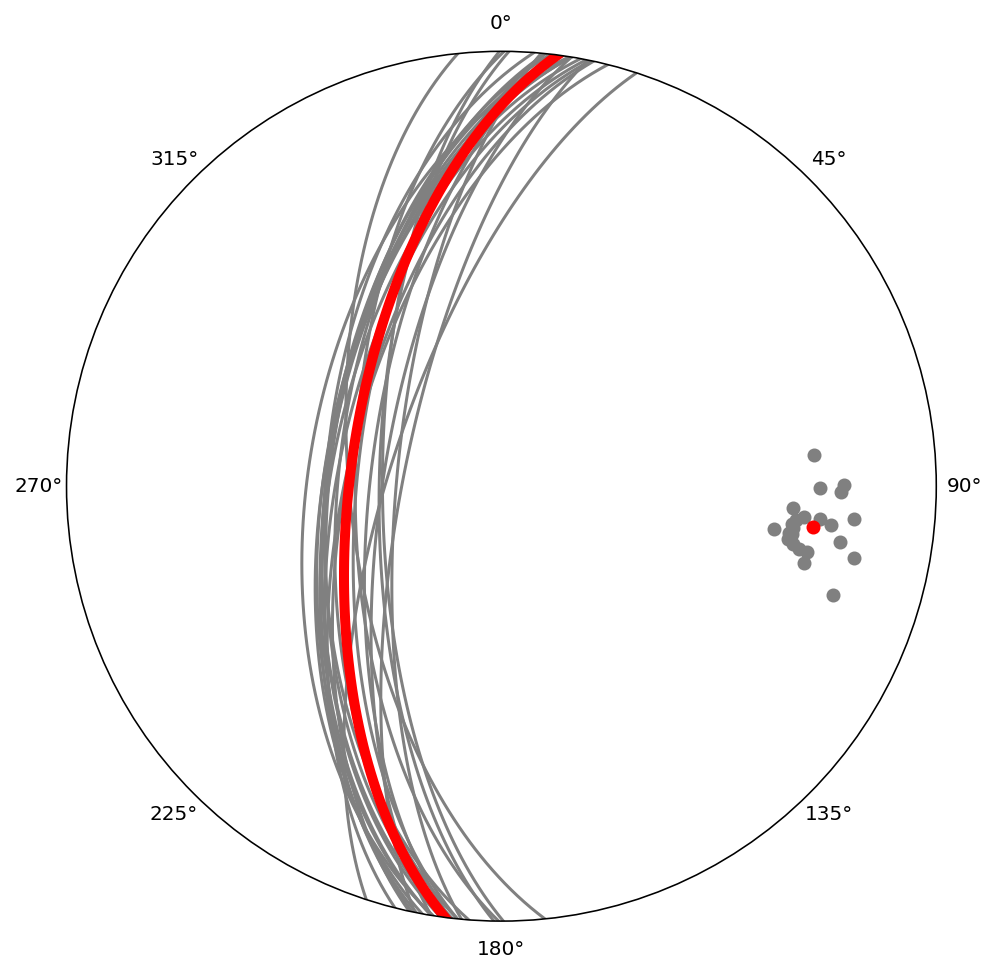

In [6]:
NW1_orientations = calc_bedding_stats(NW1_1_9_data)
NW1_ax = plot_bedding_stats(NW1_1_9_data)

In [7]:
# since these beds are overturned, the actual dip should be 180-dip
180-61

119

## Natural Wall section 1 specimen 10 to 15

Only re-calculating this orientation because there isn't one cauclulated in the field. This is based on analyzing field noes and planes taken at the time at the location. Refer to NSH Clino export for details.

In [3]:
NW1_10_15_data = pd.read_csv('../Data/Bedding_orientations/NW1_10_15_bedding.csv')
# NW1_10_15_data.shape[0]

dip_dir; strike; dip; n:  [291. 201.  83.  11.]


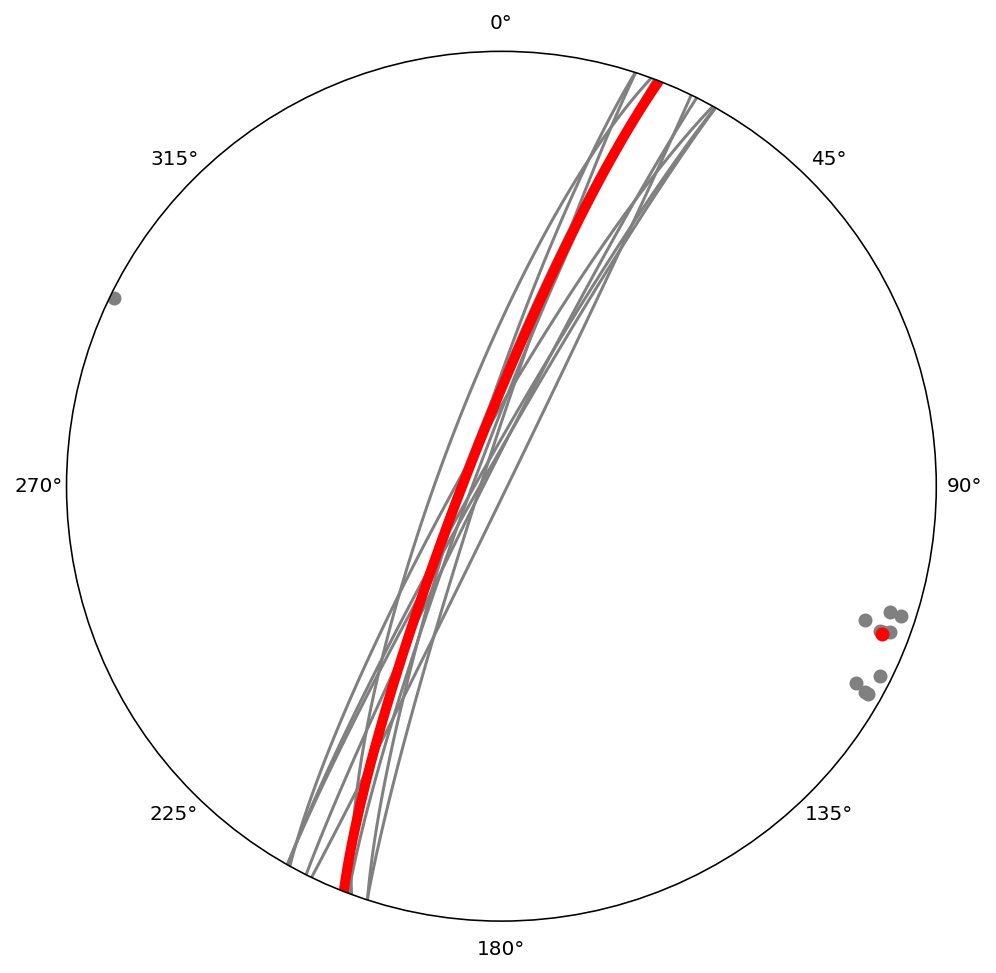

In [4]:
NW1_orientations = calc_bedding_stats(NW1_10_15_data)
NW1_ax = plot_bedding_stats(NW1_10_15_data)

## Natural Wall section 2

3 measurement by Blake
dip_dir-dip: 

In [5]:
ipmag.fisher_mean([180, 194, 167], [2, 5, 3])

{'dec': 180.31890321308728,
 'inc': 3.3956873093129705,
 'n': 3,
 'r': 2.94424377562142,
 'k': 35.8704345979415,
 'alpha95': 20.893186902829214,
 'csd': 13.524359285154}

## Agate Falls site 1
River left section

In [7]:
AF1_orientations = pd.read_csv('../Data/Bedding_orientations/AF1_orientations.csv')
AF1_orientations = AF1_orientations[AF1_orientations['unitId']== ' Jacobsville']
AF1_orientations.shape

(4, 19)

dip_dir; strike; dip; n:  [332. 242.   1.   4.]


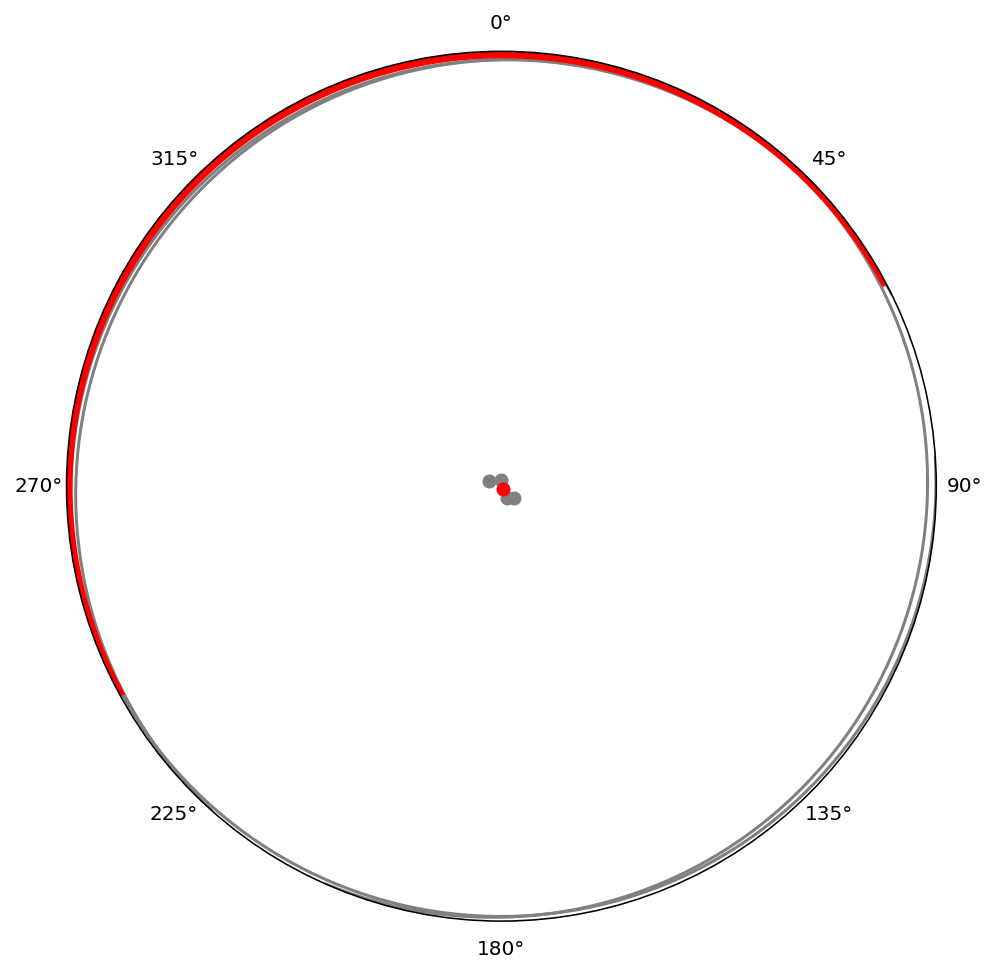

In [8]:
AF1_orientations = calc_bedding_stats(AF1_orientations)
AF1_ax = plot_bedding_stats(AF1_orientations)

## Agate Falls site 2 
River right, 37 measurements

In [9]:
AF2_orientations = pd.read_csv('../Data/Bedding_orientations/AF2_orientations.csv')
AF2_orientations = AF2_orientations[AF2_orientations['unitId']== ' Jacobsville']
AF2_orientations.shape

(37, 10)

dip_dir; strike; dip; n:  [330. 240.   4.  37.]


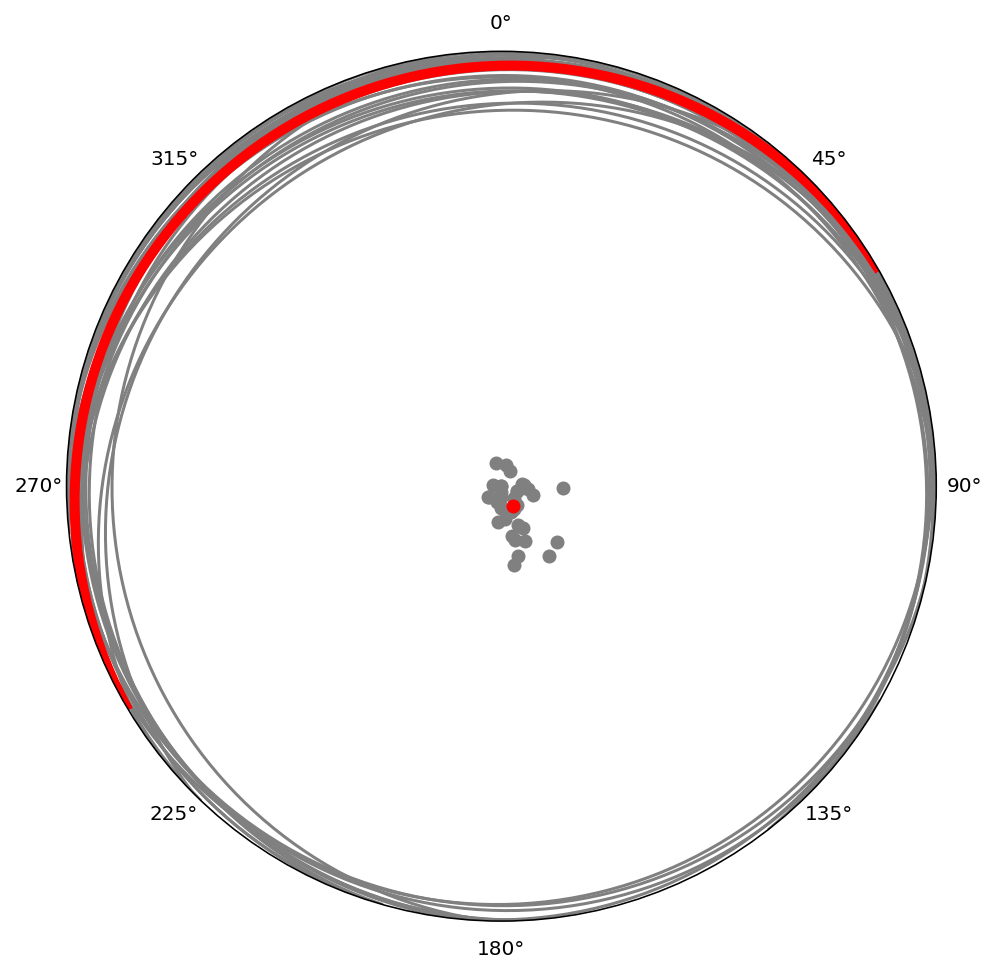

In [10]:
AF2_orientations = calc_bedding_stats(AF2_orientations)
AF2_ax = plot_bedding_stats(AF2_orientations)

## HF1

In [11]:
HF1_orientations = pd.read_csv('../Data/Bedding_orientations/HF1_orientations.csv')
HF1_orientations = HF1_orientations[~HF1_orientations['unitId'].str.contains('intraclast')]
# HF1_orientations

dip_dir; strike; dip; n:  [297. 207.   8.  41.]


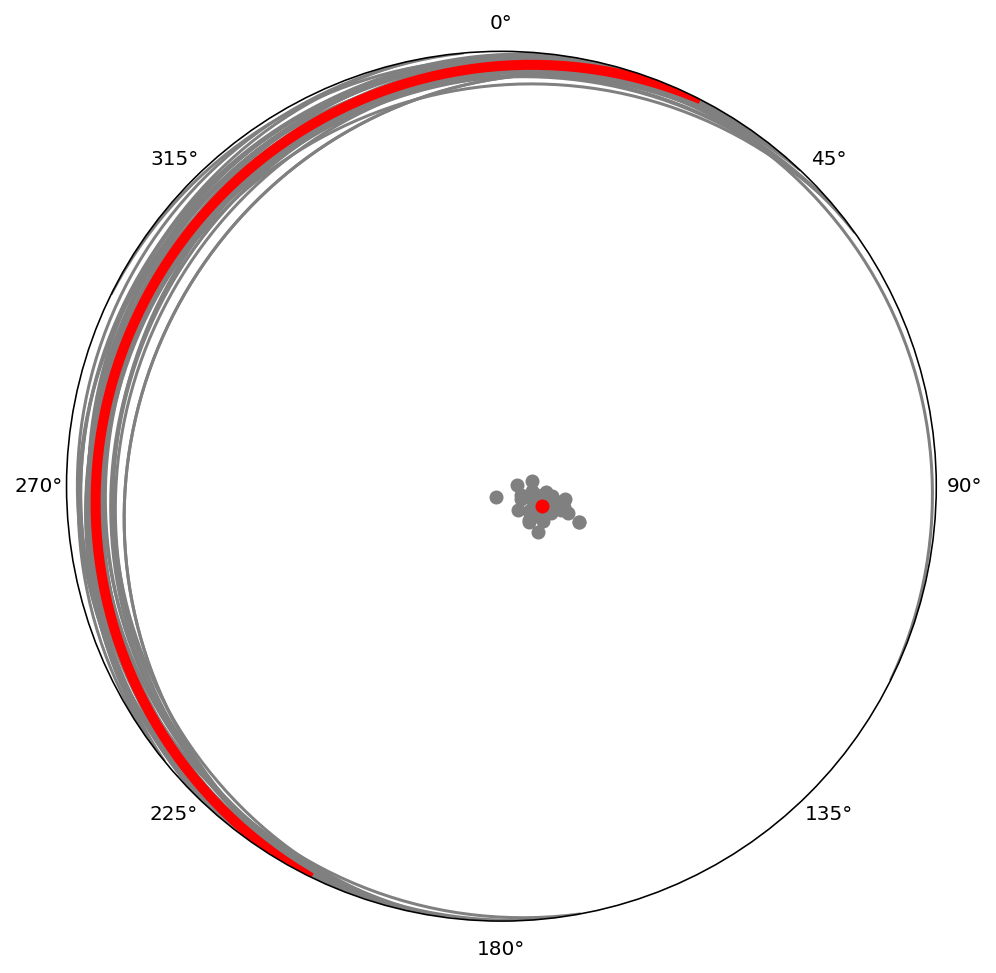

In [12]:
HF1_orientations = calc_bedding_stats(HF1_orientations)
HF1_ax = plot_bedding_stats(HF1_orientations)

## HF2

In [13]:
HF2_orientations = pd.read_csv('../Data/Bedding_orientations/HF2_orientations.csv')
HF2_orientations = HF2_orientations[~HF2_orientations['unitId'].str.contains('intraclast')]
# HF1_orientations

dip_dir; strike; dip; n:  [295. 205.   9.  18.]


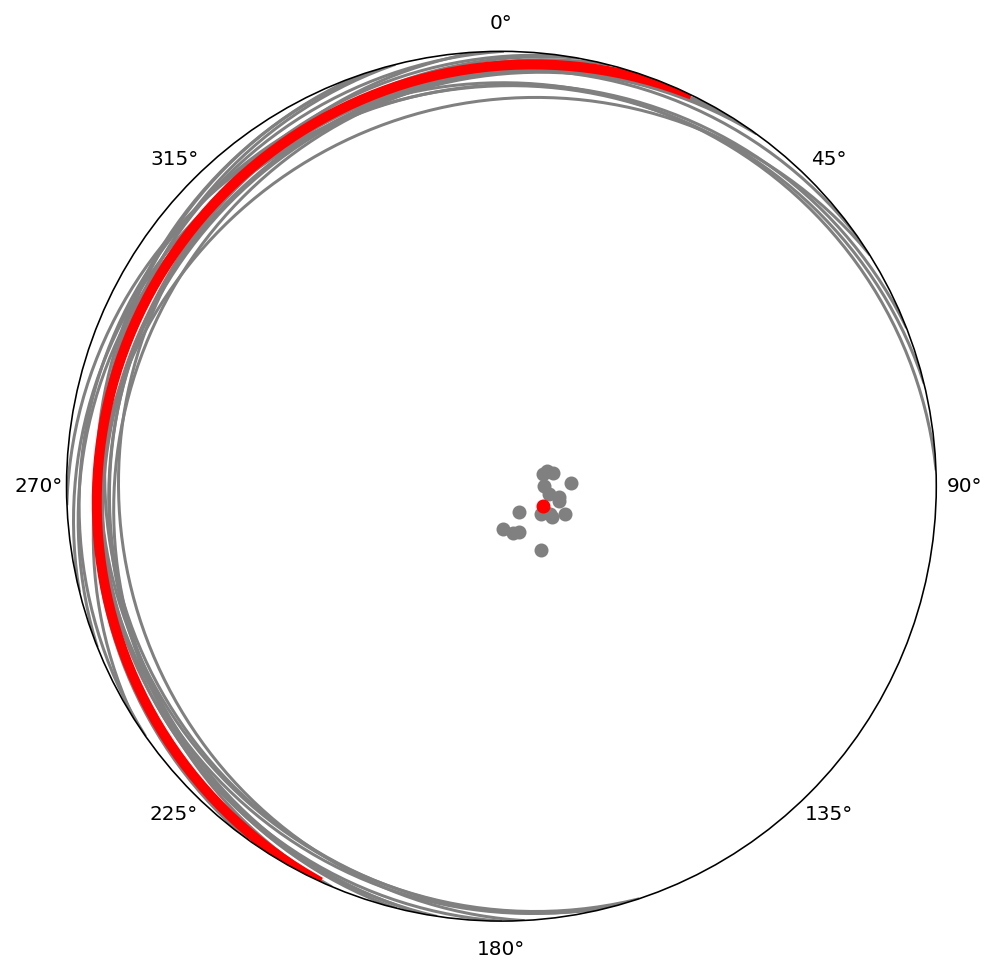

In [14]:
HF2_orientations = calc_bedding_stats(HF2_orientations)
HF2_ax = plot_bedding_stats(HF2_orientations)

## HF3

In [15]:
HF3_orientations = pd.read_csv('../Data/Bedding_orientations/HF3_orientations.csv')
HF3_orientations = HF3_orientations[~HF3_orientations['unitId'].str.contains('intraclast')]
# HF1_orientations

dip_dir; strike; dip; n:  [278. 188.  10.   8.]


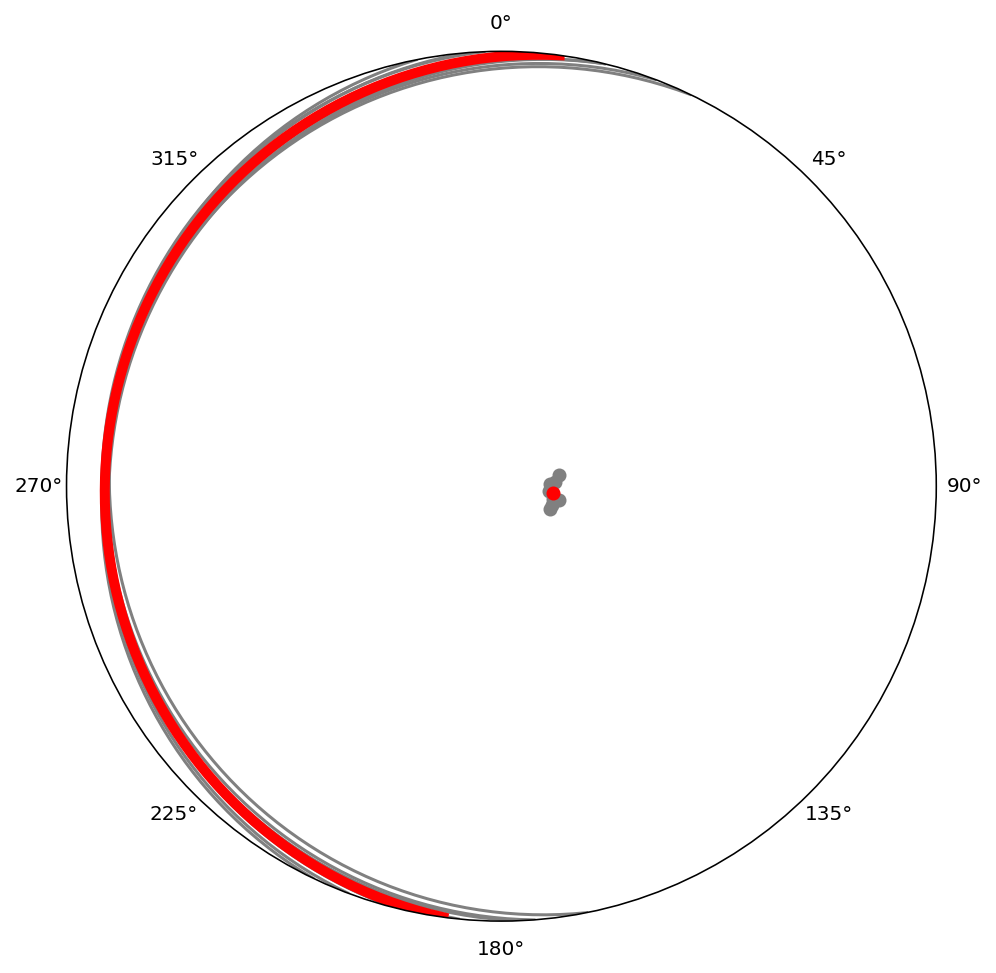

In [16]:
HF3_orientations = calc_bedding_stats(HF3_orientations)
HF3_ax = plot_bedding_stats(HF3_orientations)

## HF4

In [17]:
HF4_orientations = pd.read_csv('../Data/Bedding_orientations/HF4_orientations.csv')
HF4_orientations = HF4_orientations[~HF4_orientations['unitId'].str.contains('intraclast')]
# HF1_orientations

dip_dir; strike; dip; n:  [324. 234.   8.   7.]


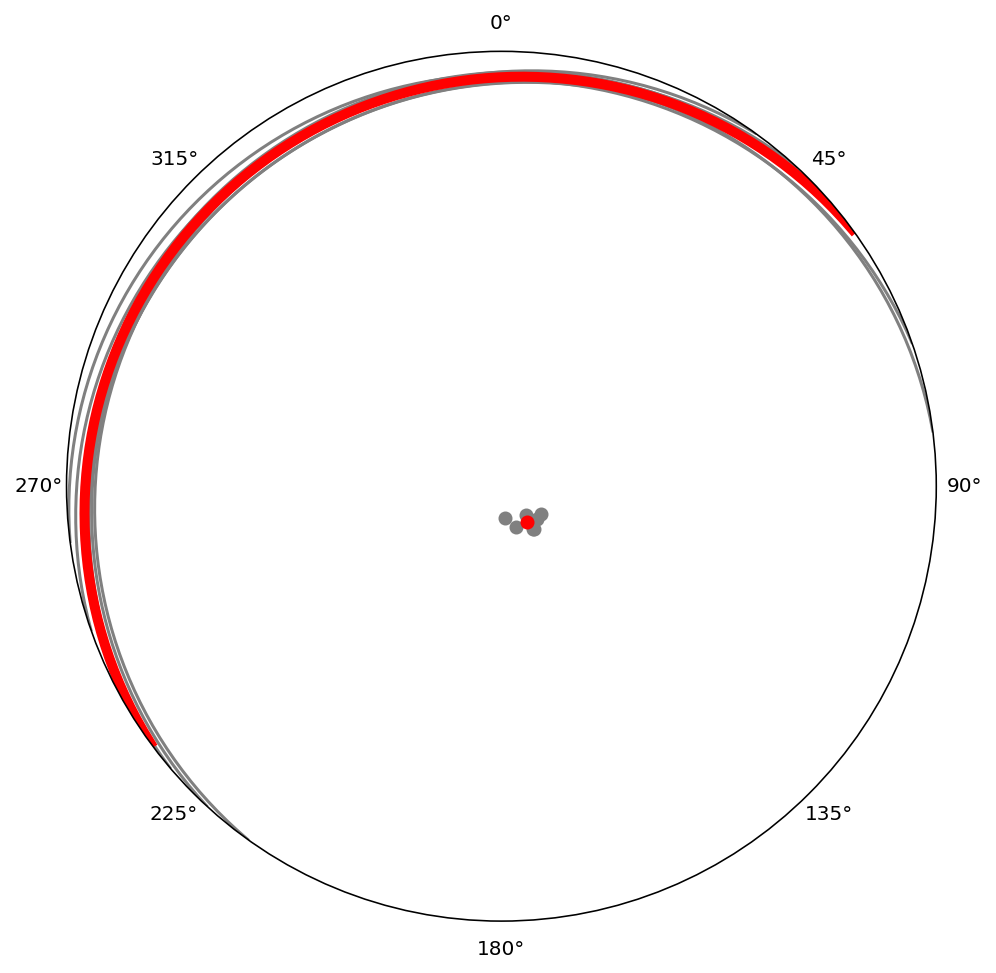

In [18]:
HF4_orientations = calc_bedding_stats(HF4_orientations)
HF4_ax = plot_bedding_stats(HF4_orientations)

## HF5
calculate fisher mean for 6 measurements for HF5

In [19]:
ipmag.fisher_mean([40, 30, 0, 254, 127,0, 0], [3,1,0,1,1,0,1])

{'dec': 14.621972261710669,
 'inc': 1.803563904107332,
 'n': 7,
 'r': 3.8809726731101764,
 'k': 1.9236766373518674,
 'alpha95': 61.341808926754055,
 'csd': 58.40082518213268}

## HF6
calculate fisher mean for 6 measurements for HF6

In [20]:
ipmag.fisher_mean([296,272, 263, 293, 297, 284], [7,8,7,9,9,5])

{'dec': 284.2120545478471,
 'inc': 7.6875127479741945,
 'n': 6,
 'r': 5.852846439397943,
 'k': 33.97811089003387,
 'alpha95': 11.658568544887567,
 'csd': 13.895859175380943}

## HF7
calculate fisher mean for 8 measurements for HF7

In [21]:
ipmag.fisher_mean([338, 342, 308, 316, 312, 306, 306, 348], [10, 10, 12, 13, 8,12, 8, 10])

{'dec': 321.9010474068007,
 'inc': 10.80887779977972,
 'n': 8,
 'r': 7.678975001785133,
 'k': 21.805155482984528,
 'alpha95': 12.130796661170892,
 'csd': 17.34624295792583}

## JK2
calculate fisher mean for 6 measurements for JK2

In [22]:
ipmag.fisher_mean([242, 259, 243, 297, 225, 216], [8,8,6,4,5,6])

{'dec': 246.24159839334783,
 'inc': 6.848140062067603,
 'n': 6,
 'r': 5.4035975419661195,
 'k': 8.383600591592398,
 'alpha95': 24.5728581141766,
 'csd': 27.974976415218975}

## JK3
| site | samples           | bed_dip  | bed_dip_trend | bed_strike | N  | Notes |
|------|-------------------|----------|---------------|------------|----|-------|
| JK3 | 1 to 5            | 17   | 288       | 198| 4  | |
| JK3 | 6,7               | 11   | 265       | 175| 2  | |
| JK3 | 8                 | 10   | 292       | 202| 4  | |

## calculate bedding orientation for Black Jack site


In [11]:
BBJ_orientations = pd.read_csv('../Data/Bedding_orientations/Black_Jack_bedding.csv')
BBJ_orientations

,latitude,longitude,zone,planeType,dip,dipAzimuth,strike,declination,unitId,timedate
0,46.505096,-89.995758,16T,Bedding,30,1,271,-2.930078,Jacobsville,Sat Jul 10 13:13:54 2021
1,46.505036,-89.995747,16T,Bedding,32,347,257,-2.930078,Jacobsville,Sat Jul 10 13:13:31 2021


In [12]:
BBJ_mean_bedding = ipmag.fisher_mean(BBJ_orientations['strike'].tolist(),BBJ_orientations['dip'].tolist())

print('mean strike: ', BBJ_mean_bedding['dec'], 'mean dip: ', BBJ_mean_bedding['inc'])

mean strike:  264.07378385859033 mean dip:  31.18955852122041


# Summary of bedding orientations for specifical pmag specimens at different sites

This is a combination of work done in the field and calculated above. 

| site | samples           | bed_dip  | bed_dip_trend | bed_strike | N  | Notes |
|------|-------------------|----------|---------------|------------|----|-------|
| NW1 | 1,2,7,8,9         | 112  | 97        | 07 | 5  | |
| NW1 | 3,4,5,6           | 121  | 96        | 06 | 10 | |
| NW1 | 10,11,12,13,14,15 | 83   | 291       | 201| 11 | |
| NW2 | all               | 2    | 204       | 114| 4  | |
| AF1 | all               | 1    | 332       | 242| 4  | |
| AF2 | all               | 4    | 330       | 240| 37 | |
| AFC | all               | 4    | 330       | 240| 37 | |
| HF1 | all | 8 | 297 | 207 | 41 | average of all measurements taken from HF1 |
| HF2 | all | 9 | 295 | 205 | 18| 18 measurements recorded by all | 
| HF3 | all | 10 | 278 | 188 | 8 | 8 measurements recorded by Blake |
| HF4 | all | 8 | 324 | 234 | 7 | 7 measurements recorded by Blake |
| HF5 | all | 2 | 015 | 285 | 6 | 6 measurements recorded by Nick |
| HF6 | all | 8 | 284 | 194 | 6 | 6 measurements recorded by Nick |
| HF7 | all | 11 | 322 | 232 | 8 | 8 measurements recorded by Nick |
| HFC | all | 8 | 297 | 207 | 41 | average of all measurements taken from HF1 |
| SC1 | 1 to 5            | 95   | 160       | 70 | 1  | |
| SC1 | 6 to 11           | 93   | 164       | 74 | 8  | |
| SC1 | 12 to 31          | 81   | 157       | 64 | 9  | |
| SC1 | 32 to 41          | 39   | 160       | 70 | 8  | |
| SC1 | 42 to 56          | 3    | 178       | 88 | 11 | |
| SC1 | 57 to 61          | 93   | 164       | 74 | 8  | |
| SC1 | 62 to 65          | 4    | 85        | 355| 8  | |
| SC1 | 66 to 67          | 4    | 120       | 30 | 4  | |
| SC1 | 68 to 73          | 4    | 135       | 45 | 6  | |
| SC1 | 74 to 75          | 7    | 151       | 61 | 6  | |
| JK2 | all               | 7    | 246       | 156| 1  | |
| JK3 | 1 to 5            | 17   | 288       | 198| 4  | |
| JK3 | 6,7               | 11   | 265       | 175| 2  | |
| JK3 | 8                 | 10   | 292       | 202| 4  | |
| BJJ | all               | 31   | 354       | 264| 37 | |


- site: site name
- samples: core samples within a particular site
- dip: average dip of the bedding plane
- dip_trend: average dip trend or dip direction of the bedding plane 
- N: number of averaged measurements

## additional bedding calculation for offset stratigraphic level between NW1 and NW2

In [11]:
NW1_NW2_offset_orientations = pd.read_csv('../Data/Bedding_orientations/NW1_NW2_offset_bedding.csv')
NW1_NW2_offset_orientations = NW1_NW2_offset_orientations[NW1_NW2_offset_orientations['unitId']== ' Jacobsville']
NW1_NW2_offset_orientations.shape

(6, 19)

In [12]:
NW1_NW2_offset_orientations

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,planeType,dip,dipAzimuth,strike,declination,unitId,timedate,notes
0,c72e9f309a237586aa4bebf4bcdd4ed7,Locality 1,a630b4c6b294ee8d469616241fb4acda,394413.954565,5.232842e+06,47.240572,-88.395108,16T,14.129331,29.340472,-1,Bedding,8.853830,139.691940,49.691940,-2.328545,Jacobsville,Fri Jul 24 10:04:46 2020,NaN
1,c72e9f309a237586aa4bebf4bcdd4ed7,Locality 1,37466db5ecd7175a5cec68baa424cc6c,394411.867508,5.232856e+06,47.240689,-88.395138,16T,10.217638,19.267865,-1,Bedding,8.628734,145.545258,55.545258,-2.328545,Jacobsville,Fri Jul 24 07:41:47 2020,NaN
2,c72e9f309a237586aa4bebf4bcdd4ed7,Locality 1,5ba59e5ef0a3fa1ad9496705da5cc3a4,394475.113763,5.232823e+06,47.240404,-88.394295,16T,21.064988,14.824053,-1,Bedding,7.451215,114.634850,24.634850,-2.328545,Jacobsville,Fri Jul 24 07:28:30 2020,NaN
3,c72e9f309a237586aa4bebf4bcdd4ed7,Locality 1,c74baffd50311bac447db0413e256339,394552.697243,5.232801e+06,47.240221,-88.393265,16T,10.865256,189.085850,-1,Bedding,6.141989,168.605072,78.605072,-2.328545,Jacobsville,Fri Jul 24 07:19:57 2020,NaN
4,c72e9f309a237586aa4bebf4bcdd4ed7,Locality 1,6027f3b555e787872504a880360a2ce6,394568.125241,5.232776e+06,47.240000,-88.393056,16T,18.201822,24.036055,-1,Bedding,2.353958,128.655334,38.655334,-2.328545,Jacobsville,Fri Jul 24 07:13:52 2020,NaN
5,c72e9f309a237586aa4bebf4bcdd4ed7,Locality 1,25218cb8306b0b2542c4ff726e52cf7f,394529.448776,5.232783e+06,47.240057,-88.393568,16T,2.743522,5.128121,-1,Bedding,3.416373,167.535660,77.535660,-2.328545,Jacobsville,Fri Jul 24 07:01:16 2020,NaN


dip_dir; strike; dip; n:  [143.  53.   6.   6.]


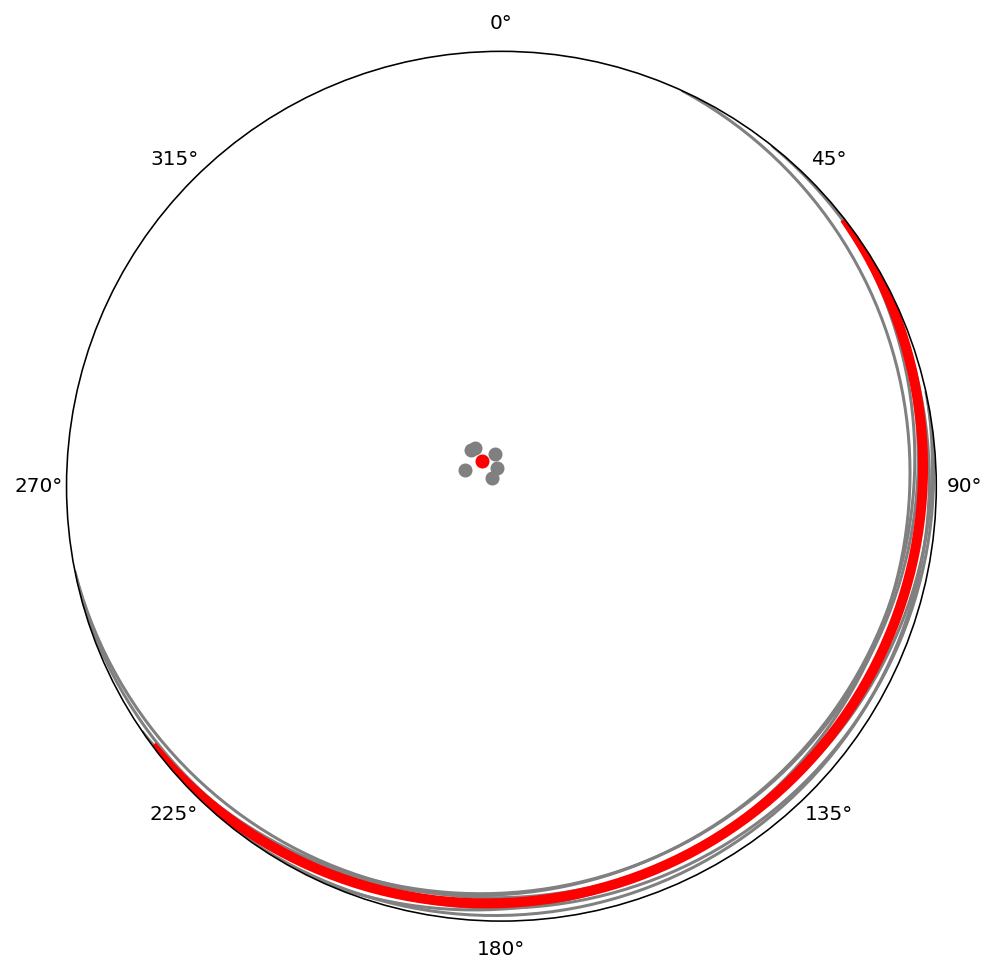

In [13]:
NW1_NW2_offset_orientations = calc_bedding_stats(NW1_NW2_offset_orientations)
NW1_NW2_offset_ax = plot_bedding_stats(NW1_NW2_offset_orientations)